# Project Description
In this project, you’ll apply the skills you learned in Introduction to Python and Intermediate Python to solve a real-world data science problem. You’ll press “watch next episode” to discover if Netflix’s movies are getting shorter over time and which guest stars appear in the most popular episode of "The Office", using everything from lists and loops to pandas and matplotlib.

In [36]:
# Create the years and durations lists
year = list(range(2011,2021))
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93,90]

# Create a dictionary with the two lists
movie_dict = {'Years':year, 'Durations': durations}

# Print the dictionary
print(movie_dict)

{'Years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'Durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


In [37]:
# Import pandas under its usual alias
import pandas as pd

#Create a DataFrame durations_df
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
print(durations_df)

   Years  Durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


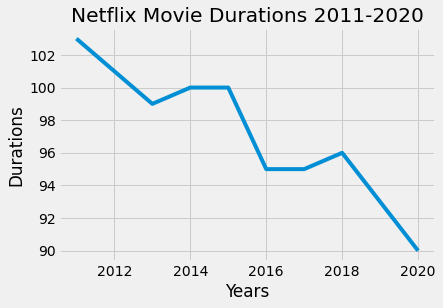

In [46]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt

# Draw a line plot of release_years and durations
plt.plot(durations_df['Years'],durations_df['Durations'])

# Create a title
plt.title('Netflix Movie Durations 2011-2020')
plt.xlabel('Years')
plt.ylabel('Durations')

# Show the plot
plt.show()

Well, it looks like there is something to the idea that movie lengths have decreased over the past ten years! But equipped only with our friend's aggregations, we're limited in the further explorations we can perform. There are a few questions about this trend that we are currently unable to answer, including:

    1. What does this trend look like over a longer period of time?
    2. Is this explainable by something like the genre of entertainment?

Upon asking our friend for the original CSV they used to perform their analyses, they gladly oblige and send it. 
We now have access to the CSV file, available at the path "datasets/netflix_data.csv". Let's create another DataFrame, this time with all of the data. Given the length of our friend's data, printing the whole DataFrame is probably not a good idea, so we will inspect it by printing only the first five rows.

In [39]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("D:\\Github\\Netflix\\netflix_data.csv")

# Print the first five rows of the DataFrame
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


Okay, we have our data! Now we can dive in and start looking at movie lengths.

Or can we? Looking at the first five rows of our new DataFrame, we notice a column type. Scanning the column, it's clear there are also TV shows in the dataset! Moreover, the duration column we planned to use seems to represent different values depending on whether the row is a movie or a show (perhaps the number of minutes versus the number of seasons)?

Fortunately, a DataFrame allows us to filter data quickly, and we can select rows where type is Movie. While we're at it, we don't need information from all of the columns, so let's create a new DataFrame netflix_movies containing only title, country, genre, release_year, and duration.

Let's put our data subsetting skills to work!

In [40]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[['title', 'country', 'genre', 'release_year', 'duration']]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head(5)

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


Okay, now we're getting somewhere. We've read in the raw data, selected rows of movies, and have limited our DataFrame to our columns of interest. Let's try visualizing the data again to inspect the data over a longer range of time.

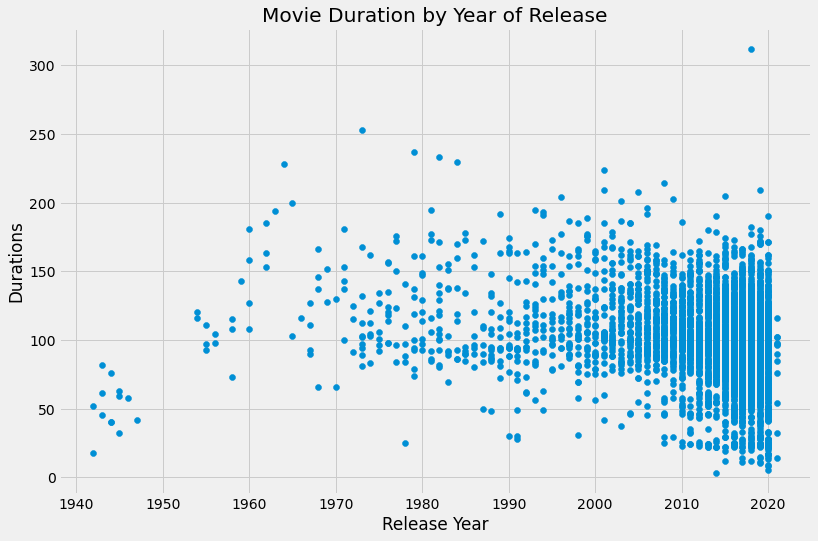

In [47]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Draw a line scatter plot of release_years and durations
plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration'])

# Create a title
plt.title('Movie Duration by Year of Release')
plt.xlabel('Release Year')
plt.ylabel('Durations')

# Show the plot
plt.show()

This is already much more informative than the simple plot we created when our friend first gave us some data. We can also see that, while newer movies are overrepresented on the platform, many short movies have been released in the past two decades.

Upon further inspection, something else is going on. Some of these films are under an hour long! Let's filter our DataFrame for movies with a duration under 60 minutes and look at the genres. This might give us some insight into what is dragging down the average.

In [35]:
# Subset the DataFrame for the short_movies
short_movie = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60]

# Print the first five rows of the new DataFrame
print(short_movie.head(20))

                                                 title         country  \
35                                           #Rucker50   United States   
55                 100 Things to do Before High School   United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...             NaN   
101                                  3 Seconds Divorce          Canada   
146                                     A 3 Minute Hug          Mexico   
162  A Christmas Special: Miraculous: Tales of Lady...          France   
171                         A Family Reunion Christmas   United States   
177                    A Go! Go! Cory Carson Christmas   United States   
178                    A Go! Go! Cory Carson Halloween             NaN   
179                  A Go! Go! Cory Carson Summer Camp             NaN   
181             A Grand Night In: The Story of Aardman  United Kingdom   
200                            A Love Song for Latasha   United States   
220                         A Russell 

Interesting! It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster.

We could eliminate these rows from our DataFrame and plot the values again. But another interesting way to explore the effect of these genres on our data would be to plot them, but mark them with a different color.

In [42]:
# Define an empty list
colors = []
for lab, row in netflix_movies_col_subset.iterrows():
    if row['genre'] == 'Children':
        colors.append('red')
    elif row['genre'] == 'Documentaries':
        colors.append('blue')
    elif row['genre'] == 'Stand-Up':
        colors.append('green')
    else:
        colors.append('black')
        
# Inspect the first 10 values in your list      
colors[0:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'blue']

Lovely looping! We now have a colors list that we can pass to our scatter plot, which should allow us to visually inspect whether these genres might be responsible for the decline in the average duration of movies.

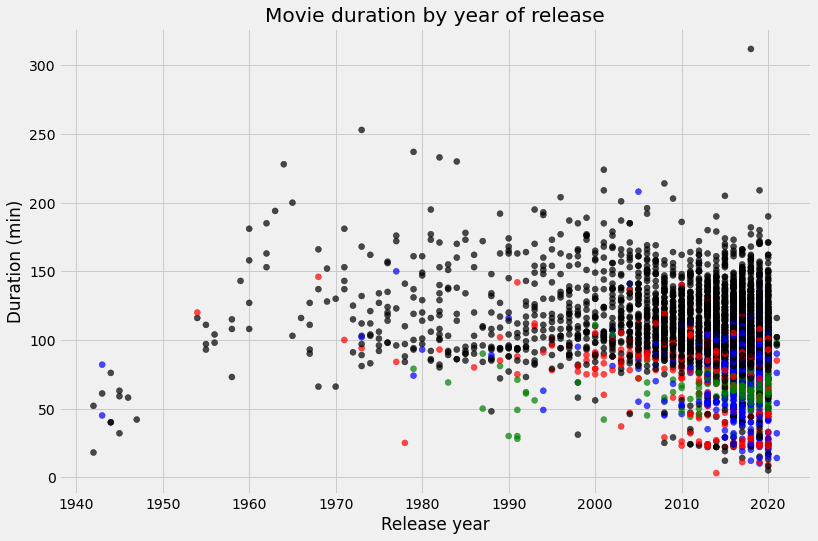

In [43]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration'],c=colors,alpha=0.7)

# Create a title and axis labels
plt.title('Movie duration by year of release')
plt.xlabel('Release year')
plt.ylabel('Duration (min)')

# Show the plot
plt.show()

In [44]:
# Are we certain that movies are getting shorter?
are_movies_getting_shorter = 'We need to perform additional analyses'

Well, as we suspected, non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot. But we can't know for certain until we perform additional analyses.